                 track_name                        artist(s)_name  \
0              Evoque Prata  DJ Escobar, MC MENOR SG, MC MENOR HR   
1             Love Language                                   SZA   
2  Used (feat. Don Toliver)                      SZA, Don Toliver   
3                   Special                                   SZA   
4                       SOS                                   SZA   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2022               9             9                   852   
1           2022              12             9                  1127   
2           2022              12             8                  1042   
3           2022              12             9                   906   
4           2022              12             9                   827   

   in_spotify_charts    streams  in_apple_playlists  in_apple_charts  ...  \
0                  0  174006928                  14                1  ...  

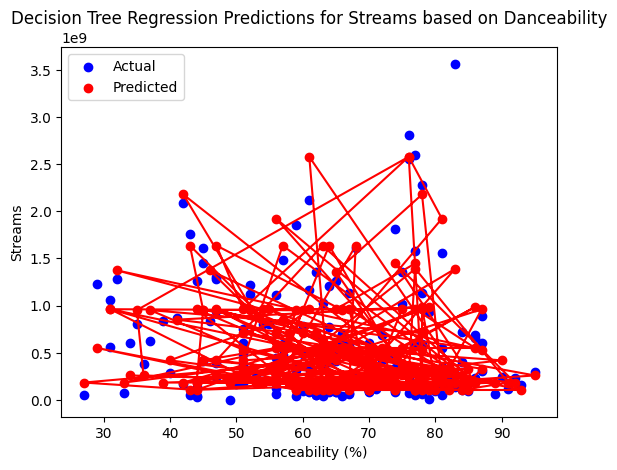

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Loading Spotify dataset
df = pd.read_csv('spotify.csv')
print(df.head())
# Checking for missing values and data types
print(df.info())
# Handle missing values by replacing them with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['artist(s)_name', 'MonthName'], drop_first=True)
#relevant features for the regression model
features = [
    'released_year',
    'released_month',
    'in_spotify_playlists',
    'in_spotify_charts',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    'in_deezer_charts',
    'in_shazam_charts',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%',
    'dance or no',
    'Energiable2',
    'MonthNumber'
]

# one-hot encoded features to the feature list
features += [col for col in df.columns if col.startswith('artist(s)_name_') or col.startswith('monthname_')]


X = df[features]
y = df['streams']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Decision Tree Regression model
model = DecisionTreeRegressor(max_depth=5,random_state=42)


model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the results for one feature
plt.scatter(X_test['danceability_%'], y_test, color='blue', label='Actual')  # Actual values
plt.scatter(X_test['danceability_%'], y_pred, color='red', label='Predicted')  # Predicted values
plt.plot(X_test['danceability_%'], y_pred, color='red')  # Line of predictions
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.title('Decision Tree Regression Predictions for Streams based on Danceability')
plt.legend()
plt.show()


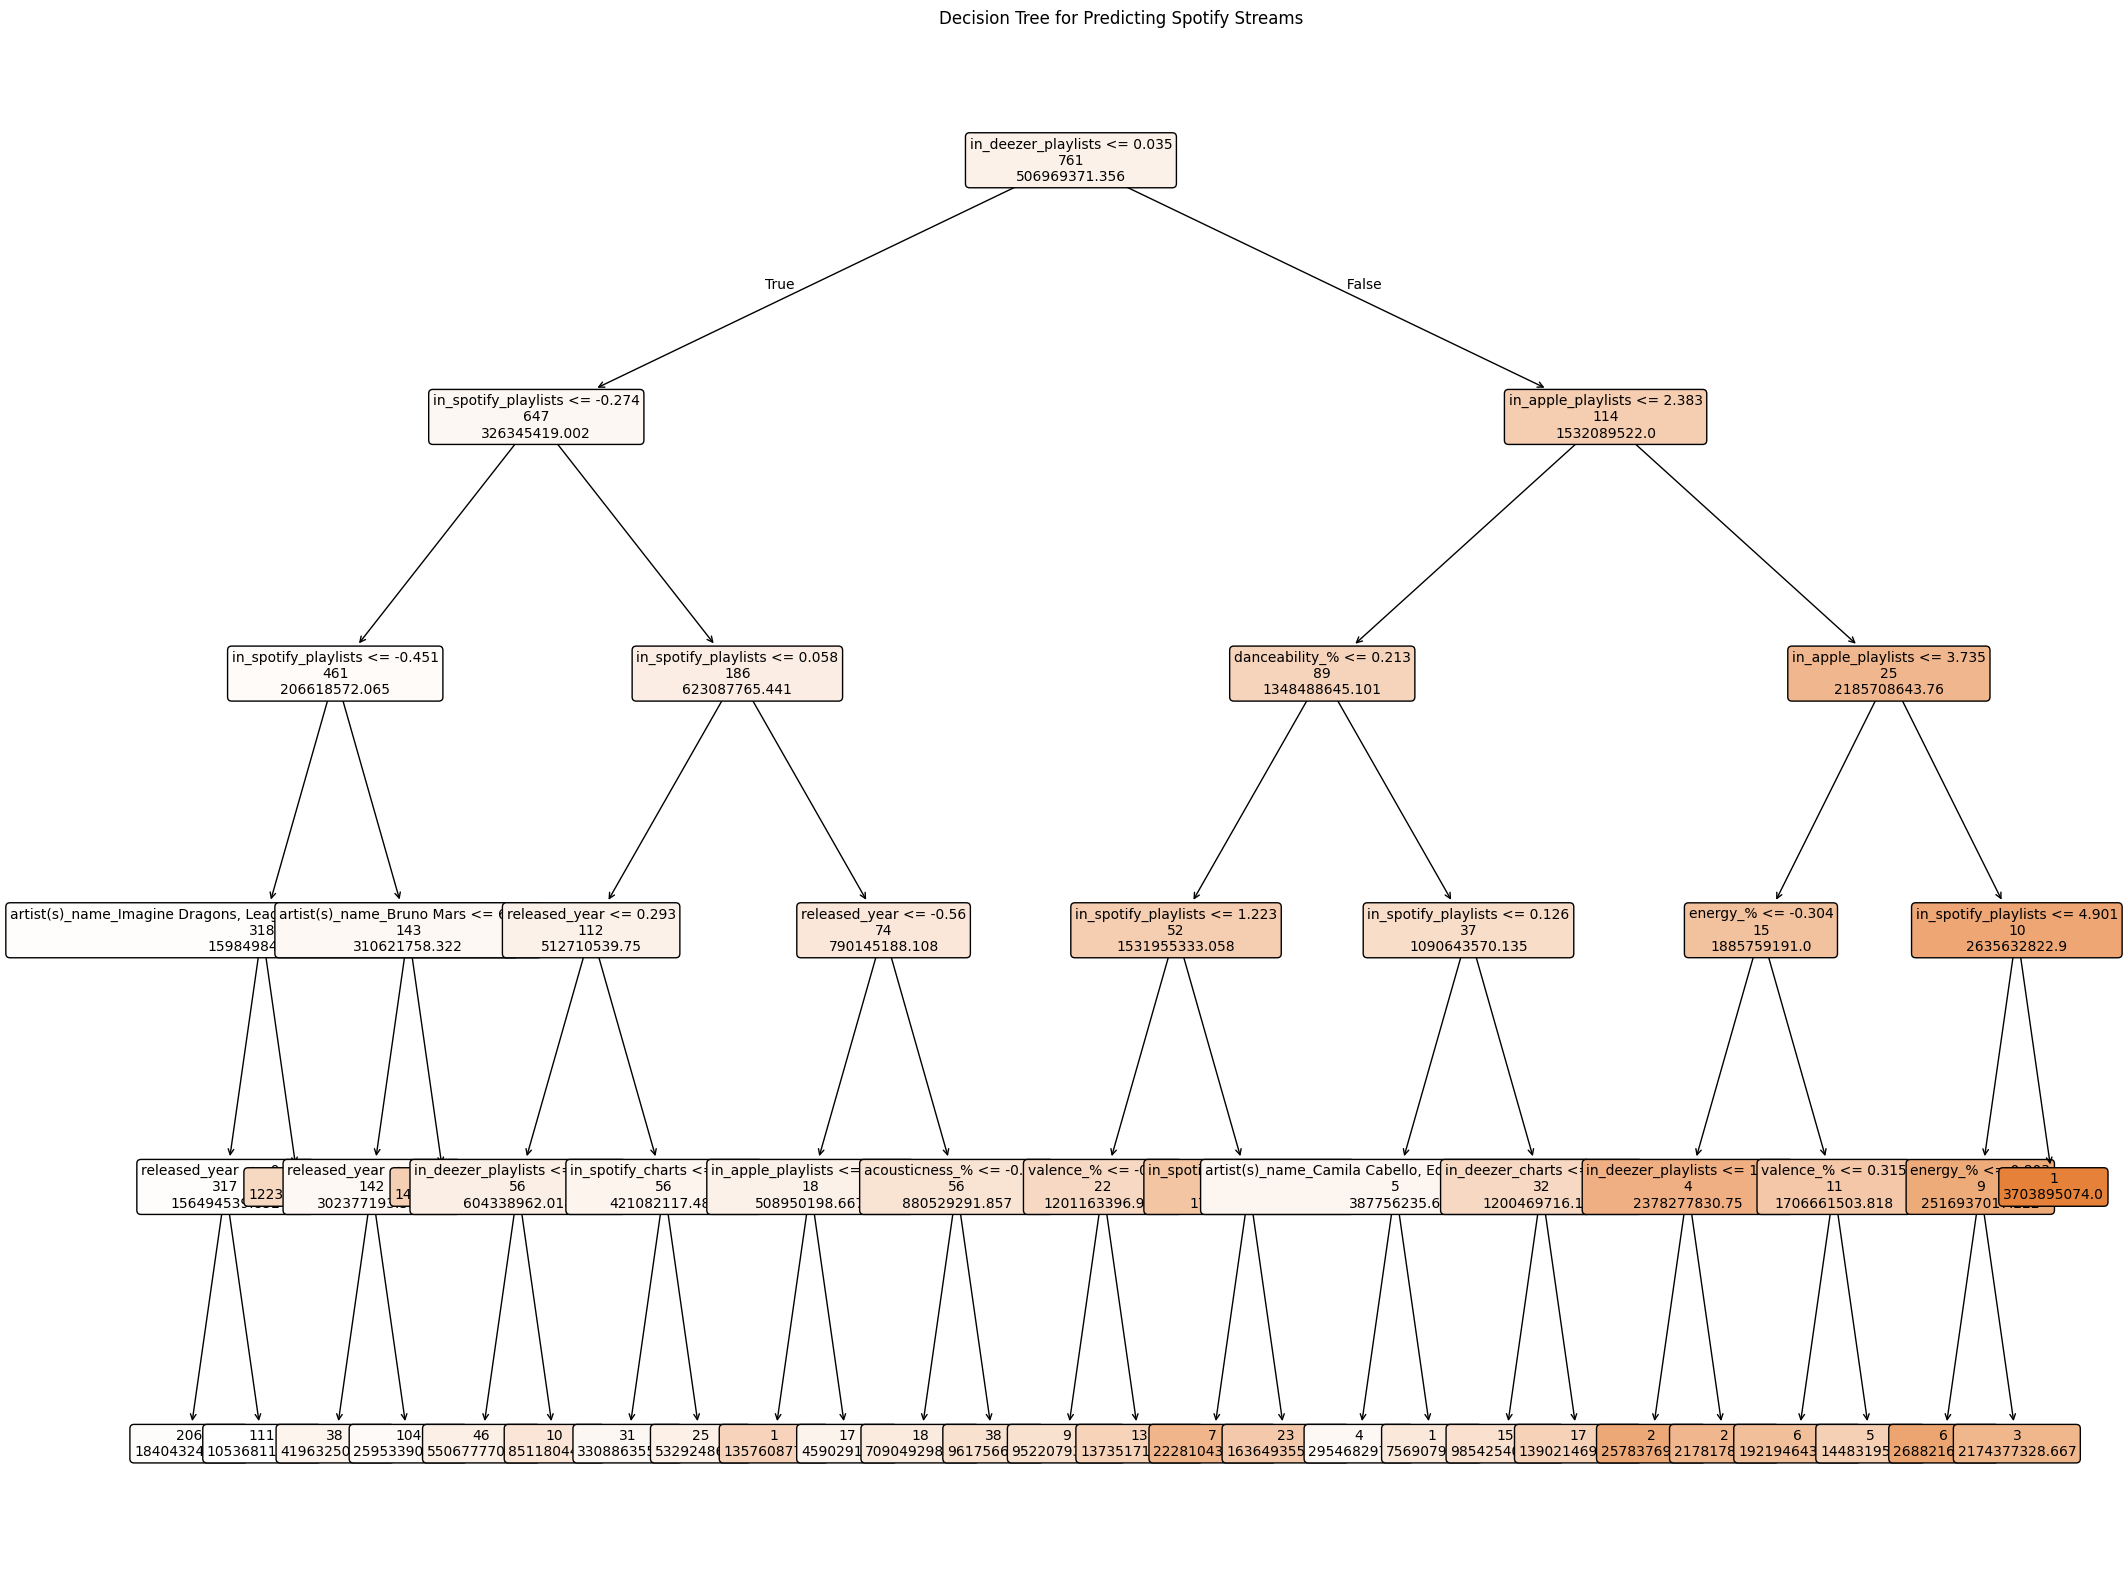

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 20))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, fontsize=10,
           node_ids=False, impurity=False, proportion=False,
           label='none')
plt.title('Decision Tree for Predicting Spotify Streams')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier
Confusion Matrix:
[[ 29   2]
 [  0 160]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.99      1.00      0.99       160

    accuracy                           0.99       191
   macro avg       0.99      0.97      0.98       191
weighted avg       0.99      0.99      0.99       191



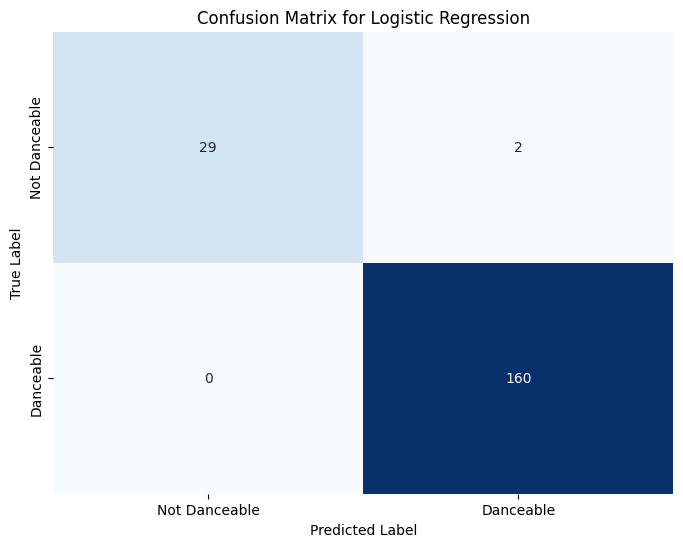

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('spotify.csv')

df.fillna(df.mean(numeric_only=True), inplace=True)

categorical_columns = ['artist(s)_name', 'key', 'mode', 'MonthName']  # Adjust as necessary

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Defining the target variable and features
X = df.drop(columns=['track_name', 'dance or no', 'streams', 'ReleasedDate', 'Year', 'DayName'])  # Adjust as necessary
y = df['dance or no']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Traininf=g the classifier
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluating the classifier
print("Logistic Regression Classifier")
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Danceable', 'Danceable'], yticklabels=['Not Danceable', 'Danceable'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Class distribution:
dance or no
1    828
0    124
Name: count, dtype: int64
Confusion Matrix:
[[125  41]
 [ 50 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       166
           1       0.74      0.70      0.72       166

    accuracy                           0.73       332
   macro avg       0.73      0.73      0.73       332
weighted avg       0.73      0.73      0.73       332



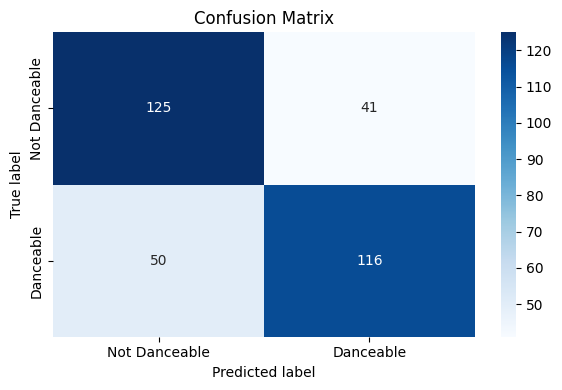

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('spotify.csv')


features = ['released_year', 'released_month', 'streams']  # Add more relevant features
X = df[features]
y = df['dance or no']

print("Class distribution:")
print(df['dance or no'].value_counts())

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets (using stratification)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Danceable', 'Danceable'], yticklabels=['Not Danceable', 'Danceable'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


Random Forest Classifier Performance:
Accuracy: 0.98
Precision: 0.98
Recall: 1.00
F1 Score: 0.99

Confusion Matrix:
[[ 27   4]
 [  0 160]]


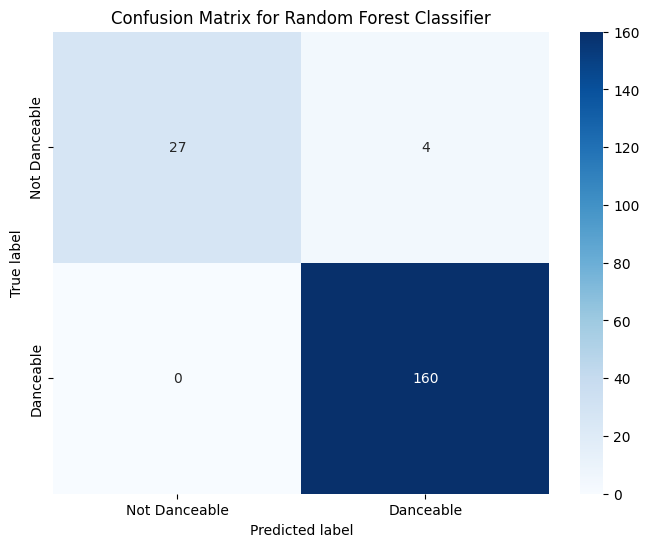


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.98      1.00      0.99       160

    accuracy                           0.98       191
   macro avg       0.99      0.94      0.96       191
weighted avg       0.98      0.98      0.98       191



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('spotify.csv')
df.fillna(df.mean(numeric_only=True), inplace=True)
categorical_columns = ['artist(s)_name', 'key', 'mode', 'MonthName']  # Adjust as necessary

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define the target variable and features
X = df.drop(columns=['track_name', 'dance or no', 'streams', 'ReleasedDate', 'Year', 'DayName'])  # Adjust as necessary
y = df['dance or no']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Danceable', 'Danceable'], yticklabels=['Not Danceable', 'Danceable'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


      Metric  Decision Tree  Logistic Regression  Random Forest
0   Accuracy            1.0             0.989529       0.979058
1  Precision            1.0             0.987654       0.975610
2     Recall            1.0             1.000000       1.000000
3   F1 Score            1.0             0.993789       0.987654


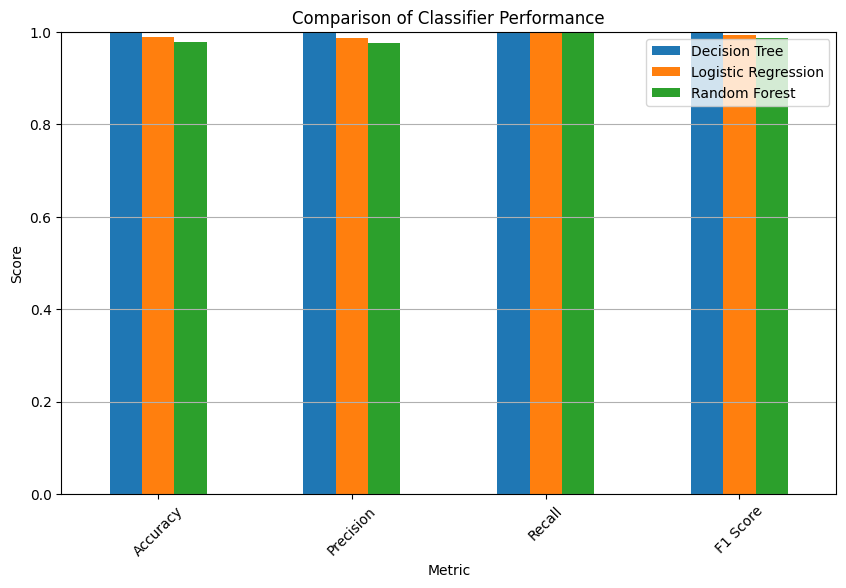

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('spotify.csv')

df.fillna(df.mean(numeric_only=True), inplace=True)

# Identify categorical columns
categorical_columns = ['artist(s)_name', 'key', 'mode', 'MonthName']  # Adjust as necessary

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define the target variable and features
X = df.drop(columns=['track_name', 'dance or no', 'streams', 'ReleasedDate', 'Year', 'DayName'])  # Adjust as necessary
y = df['dance or no']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Fit classifiers
decision_tree.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate classifiers
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Decision Tree": [
        accuracy_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_tree)
    ],
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_log_reg),
        precision_score(y_test, y_pred_log_reg),
        recall_score(y_test, y_pred_log_reg),
        f1_score(y_test, y_pred_log_reg)
    ],
    "Random Forest": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ]
}

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot metrics for comparison
metrics_df.set_index("Metric").plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classifier Performance')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
